In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix



In [73]:
data = pd.read_csv("updated_coal.csv")
data

,Unnamed: 0,Country,Year,Production,tCO2eq,subsector,methane (m3),methane(kg),methane(gwp100) kg,methane(gwp20) kg,methane(tonne),methane(gwp100) tonne,methane (gwp20) tonne,methane CO2eq,netCO2
0,0,AFG,2010,725000.0,242150.0,bituminous,2175000.0,1655175.0,41379375.0,1.423450e+08,1655.175,41379.375,142345.050,2813.7975,200770.625
1,1,AFG,2011,750000.0,250500.0,bituminous,2250000.0,1712250.0,42806250.0,1.472535e+08,1712.250,42806.250,147253.500,2910.8250,207693.750
2,2,AFG,2012,780000.0,260520.0,bituminous,2340000.0,1780740.0,44518500.0,1.531436e+08,1780.740,44518.500,153143.640,3027.2580,216001.500
3,3,AFG,2013,936000.0,312624.0,bituminous,2808000.0,2136888.0,53422200.0,1.837724e+08,2136.888,53422.200,183772.368,3632.7096,259201.800
4,4,AFG,2014,1347000.0,449898.0,bituminous,4041000.0,3075201.0,76880025.0,2.644673e+08,3075.201,76880.025,264467.286,5227.8417,373017.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2784,XKX,2017,7575000.0,2530050.0,bituminous,22725000.0,17293725.0,432343125.0,1.487260e+09,17293.725,432343.125,1487260.350,29399.3325,2097706.875
2785,2785,XKX,2018,7170000.0,2394780.0,bituminous,21510000.0,16369110.0,409227750.0,1.407743e+09,16369.110,409227.750,1407743.460,27827.4870,1985552.250
2786,2786,XKX,2019,8063000.0,2693042.0,bituminous,24189000.0,18407829.0,460195725.0,1.583073e+09,18407.829,460195.725,1583073.294,31293.3093,2232846.275
2787,2787,XKX,2020,7500000.0,2505000.0,bituminous,22500000.0,17122500.0,428062500.0,1.472535e+09,17122.500,428062.500,1472535.000,29108.2500,2076937.500


In [74]:
data.drop('Unnamed: 0', axis=1, inplace=True)


In [75]:
data

,Country,Year,Production,tCO2eq,subsector,methane (m3),methane(kg),methane(gwp100) kg,methane(gwp20) kg,methane(tonne),methane(gwp100) tonne,methane (gwp20) tonne,methane CO2eq,netCO2
0,AFG,2010,725000.0,242150.0,bituminous,2175000.0,1655175.0,41379375.0,1.423450e+08,1655.175,41379.375,142345.050,2813.7975,200770.625
1,AFG,2011,750000.0,250500.0,bituminous,2250000.0,1712250.0,42806250.0,1.472535e+08,1712.250,42806.250,147253.500,2910.8250,207693.750
2,AFG,2012,780000.0,260520.0,bituminous,2340000.0,1780740.0,44518500.0,1.531436e+08,1780.740,44518.500,153143.640,3027.2580,216001.500
3,AFG,2013,936000.0,312624.0,bituminous,2808000.0,2136888.0,53422200.0,1.837724e+08,2136.888,53422.200,183772.368,3632.7096,259201.800
4,AFG,2014,1347000.0,449898.0,bituminous,4041000.0,3075201.0,76880025.0,2.644673e+08,3075.201,76880.025,264467.286,5227.8417,373017.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,XKX,2017,7575000.0,2530050.0,bituminous,22725000.0,17293725.0,432343125.0,1.487260e+09,17293.725,432343.125,1487260.350,29399.3325,2097706.875
2785,XKX,2018,7170000.0,2394780.0,bituminous,21510000.0,16369110.0,409227750.0,1.407743e+09,16369.110,409227.750,1407743.460,27827.4870,1985552.250
2786,XKX,2019,8063000.0,2693042.0,bituminous,24189000.0,18407829.0,460195725.0,1.583073e+09,18407.829,460195.725,1583073.294,31293.3093,2232846.275
2787,XKX,2020,7500000.0,2505000.0,bituminous,22500000.0,17122500.0,428062500.0,1.472535e+09,17122.500,428062.500,1472535.000,29108.2500,2076937.500


In [76]:
data.isnull().sum()

Country                  0
Year                     0
Production               0
tCO2eq                   0
subsector                0
methane (m3)             0
methane(kg)              0
methane(gwp100) kg       0
methane(gwp20) kg        0
methane(tonne)           0
methane(gwp100) tonne    0
methane (gwp20) tonne    0
methane CO2eq            0
netCO2                   0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2789 non-null   object 
 1   Year                   2789 non-null   int64  
 2   Production             2789 non-null   float64
 3   tCO2eq                 2789 non-null   float64
 4   subsector              2789 non-null   object 
 5   methane (m3)           2789 non-null   float64
 6   methane(kg)            2789 non-null   float64
 7   methane(gwp100) kg     2789 non-null   float64
 8   methane(gwp20) kg      2789 non-null   float64
 9   methane(tonne)         2789 non-null   float64
 10  methane(gwp100) tonne  2789 non-null   float64
 11  methane (gwp20) tonne  2789 non-null   float64
 12  methane CO2eq          2789 non-null   float64
 13  netCO2                 2789 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 305.2+

In [78]:
data.describe()

,Year,Production,tCO2eq,methane (m3),methane(kg),methane(gwp100) kg,methane(gwp20) kg,methane(tonne),methane(gwp100) tonne,methane (gwp20) tonne,methane CO2eq,netCO2
count,2789.000000,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03,2.789000e+03
mean,2016.058085,2.764748e+07,9.234258e+06,8.437674e+07,6.421070e+07,1.605267e+09,5.522120e+09,6.421070e+04,1.605267e+06,5.522120e+06,1.091582e+05,7.628990e+06
std,3.298112,1.870444e+08,6.247283e+07,5.628011e+08,4.282916e+08,1.070729e+10,3.683308e+10,4.282916e+05,1.070729e+07,3.683308e+07,7.280958e+05,5.177986e+07
min,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2014.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2016.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2019.000000,6.777760e+05,2.263772e+05,2.033328e+06,1.547363e+06,3.868407e+07,1.330732e+08,1.547363e+03,3.868407e+04,1.330732e+05,2.630516e+03,1.876931e+05
max,2021.000000,3.000000e+09,1.002000e+09,9.000000e+09,6.849000e+09,1.712250e+11,5.890140e+11,6.849000e+06,1.712250e+08,5.890140e+08,1.164330e+07,8.307750e+08


In [79]:
data['Country'] = LabelEncoder().fit_transform(data['Country'])
data['subsector'] = LabelEncoder().fit_transform(data['subsector'])



In [80]:
data.corr()

,Country,Year,Production,tCO2eq,subsector,methane (m3),methane(kg),methane(gwp100) kg,methane(gwp20) kg,methane(tonne),methane(gwp100) tonne,methane (gwp20) tonne,methane CO2eq,netCO2
Country,1.000000,0.180869,-0.059031,-0.059031,-0.074866,-0.059433,-0.059433,-0.059433,-0.059433,-0.059433,-0.059433,-0.059433,-0.059433,-0.058931
Year,0.180869,1.000000,-0.004709,-0.004709,-0.025179,-0.003615,-0.003615,-0.003615,-0.003615,-0.003615,-0.003615,-0.003615,-0.003615,-0.004934
Production,-0.059031,-0.004709,1.000000,1.000000,-0.181865,0.998892,0.998892,0.998892,0.998892,0.998892,0.998892,0.998892,0.998892,0.999953
tCO2eq,-0.059031,-0.004709,1.000000,1.000000,-0.181865,0.998892,0.998892,0.998892,0.998892,0.998892,0.998892,0.998892,0.998892,0.999953
subsector,-0.074866,-0.025179,-0.181865,-0.181865,1.000000,-0.184779,-0.184779,-0.184779,-0.184779,-0.184779,-0.184779,-0.184779,-0.184779,-0.181212
methane (m3),-0.059433,-0.003615,0.998892,0.998892,-0.184779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998386
methane(kg),-0.059433,-0.003615,0.998892,0.998892,-0.184779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998386
methane(gwp100) kg,-0.059433,-0.003615,0.998892,0.998892,-0.184779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998386
methane(gwp20) kg,-0.059433,-0.003615,0.998892,0.998892,-0.184779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998386
methane(tonne),-0.059433,-0.003615,0.998892,0.998892,-0.184779,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998386


In [81]:
data.head()
data['Production'].nunique()

796

<AxesSubplot:>

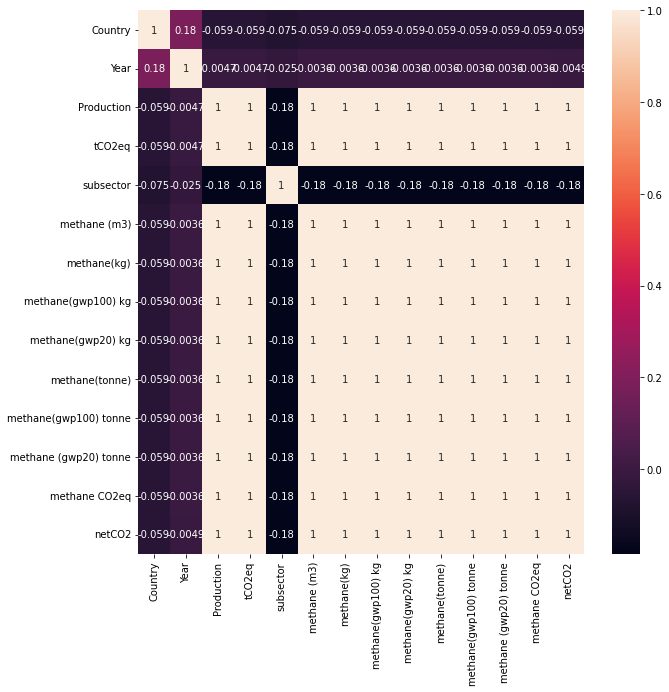

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [83]:
# sns.pairplot(data.corr())

In [84]:
data['subsector'].value_counts()

3    1676
1     527
2     383
0     139
4      64
Name: subsector, dtype: int64

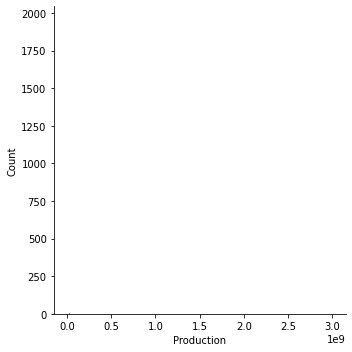

In [85]:
sns.displot(data['Production'])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subsector', ylabel='Production'>

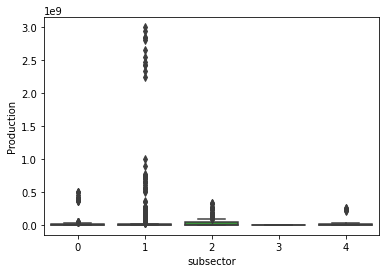

In [86]:
sns.boxplot(data['subsector'], data['Production'])

In [87]:
# Remove Outliers from whole dataset
 
df = data._get_numeric_data()
column = df.columns.to_list()

for col in column:
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    LB = Q1 - (1.5 * IQR)
    UB = Q3 + (1.5 * IQR)
    data[col] = np.where(data[col] < LB, LB, data[col])
    data[col] = np.where(data[col] > UB, UB, data[col])

for col in column:
    data[col] = df[col]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subsector', ylabel='Production'>

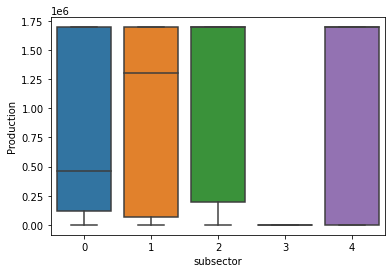

In [88]:
sns.boxplot(data['subsector'], data['Production'])

In [89]:
y=data.Production
x = data.drop(['Production'], axis=1)
x

,Country,Year,tCO2eq,subsector,methane (m3),methane(kg),methane(gwp100) kg,methane(gwp20) kg,methane(tonne),methane(gwp100) tonne,methane (gwp20) tonne,methane CO2eq,netCO2
0,1,2010,242150.00,1,2175000.0,1655175.00,41379375.0,1.423450e+08,1655.17500,41379.375,142345.05000,2813.797500,200770.625
1,1,2011,250500.00,1,2250000.0,1712250.00,42806250.0,1.472535e+08,1712.25000,42806.250,147253.50000,2910.825000,207693.750
2,1,2012,260520.00,1,2340000.0,1780740.00,44518500.0,1.531436e+08,1780.74000,44518.500,153143.64000,3027.258000,216001.500
3,1,2013,312624.00,1,2808000.0,2136888.00,53422200.0,1.837724e+08,2136.88800,53422.200,183772.36800,3632.709600,259201.800
4,1,2014,449898.00,1,4041000.0,3075201.00,76880025.0,2.644673e+08,3075.20100,76880.025,264467.28600,5227.841700,373017.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,219,2017,565942.96,1,5083320.0,3868406.52,96710163.0,3.326830e+08,3868.40652,96710.163,332682.96072,6576.291084,469232.797
2785,219,2018,565942.96,1,5083320.0,3868406.52,96710163.0,3.326830e+08,3868.40652,96710.163,332682.96072,6576.291084,469232.797
2786,219,2019,565942.96,1,5083320.0,3868406.52,96710163.0,3.326830e+08,3868.40652,96710.163,332682.96072,6576.291084,469232.797
2787,219,2020,565942.96,1,5083320.0,3868406.52,96710163.0,3.326830e+08,3868.40652,96710.163,332682.96072,6576.291084,469232.797


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [91]:
tree = tree.DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [92]:
pd.DataFrame({'Predicted ':y_pred, 'Actual: ':y_test})

,Predicted,Actual:
1525,0.0,0.0
2248,0.0,0.0
2198,1694440.0,1694440.0
687,0.0,0.0
1191,0.0,0.0
...,...,...
1736,0.0,0.0
2569,0.0,0.0
2653,1694440.0,1694440.0
2612,0.0,0.0


In [93]:
# print('Accuracy: ', accuracy_score(x_train, y_train))

In [94]:
print('Accuracy: ', tree.score(x_train, y_train))
print('Accuracy: ', tree.score(x_test, y_test))

Accuracy:  1.0
Accuracy:  0.9999673945235709


In [95]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Sqaure Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Sqaure Error: ', r2_score(y_test, y_pred))

Mean Absolute Error:  741.4390681003584
Mean Sqaure Error:  15173043.754480287
Root Mean Sqaure Error:  0.9999673945235709
